In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io
import pandas as pd
from skimage import color
from skimage import io
from skimage.transform import radon, iradon, iradon_sart, rescale
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio
import math
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ctScans = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_hw1.mat')
ctMasks = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/infmsk_hw1.mat')

In [ ]:
(ms,ns,cs)= (ctScans['ctscan']).shape
(mm,nm,cm)= (ctMasks['infmsk']).shape
print((ms,ns,cs))
print((mm,nm,cm))

(512, 512, 3554)
(512, 512, 3554)


In [ ]:
ctscansarray = []
ctmasksarray = []
for i in range(cm):
    ctscansarray.append((ctScans['ctscan'][:,:,i]))
    ctmasksarray.append((ctMasks['infmsk'][:,:,i]))

In [ ]:
image = ctscansarray[3514]
image.shape

(512, 512)

In [ ]:

class CT:

	def __init__(self, image, max_angle, filter_name):
		"""
		Parameter: input CT slice, max_angle=180 deg, filter_name for Filterback Projection
		"""
		self.image = image
		self.max_angle = max_angle
		self.filter = filter_name

	def process_image(self):
		"""Scale the image and calculate the numbers of projection"""

		image_scaled = rescale(self.image, scale=1, mode='reflect', multichannel=False)
		theta = np.linspace(0.0, self.max_angle, num = 23) # num =45/23 for 4X and 23 for 8X
		num_projection = len(theta)*max(image_scaled.shape)
		
		return image_scaled, theta, num_projection

	def radon_transform(self):
		"""Calculate sinogram using radon transformation"""

		img, theta, __ = self.process_image()
		sinogram = radon(img, theta=theta)

		return sinogram


	def filtered_back_projection(self):
		"""Back projection to reconstruct image from sinogram"""

		__, theta, __ = self.process_image()
		sinogram = self.radon_transform()

		reconstruction = iradon(sinogram, theta=theta, filter_name=self.filter)

		return reconstruction

In [ ]:
sinogram120 = []
reconstructedCT_FBP120 = []
reconstructedCT_SART120 = []
ClassData = []
max_angle = 120
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
for i in range(len(ctscansarray)):
  ClassData.append(CT(ctscansarray[i],max_angle,filter_used))
for i in range(len(ctscansarray)):
  sinogram120.append(ClassData[i].radon_transform())
  reconstructedCT_FBP120.append(ClassData[i].filtered_back_projection())
  #reconstructedCT_SART.append(ClassData[i].sart())

/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


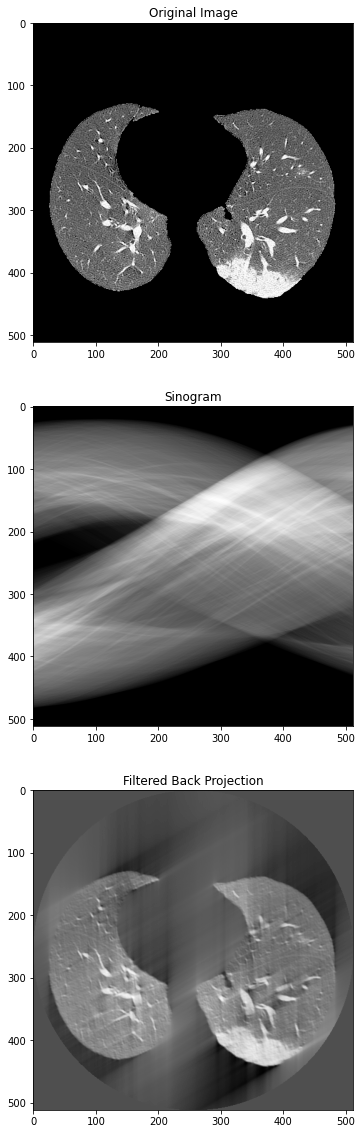

In [ ]:
# with max_angle = 120 deg.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[600], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram120[600], cmap=plt.cm.Greys_r)

#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP120[600], cmap=plt.cm.Greys_r)

In [ ]:
PSNR =[]
SSIM = []
for i in range(len(reconstructedCT_FBP120)):
  PSNR.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP120[i]))
  SSIM.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP120[i], multichannel=False))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


In [ ]:
print(PSNR[600])
print(SSIM[600])

12.42797968024357
0.6532645623728417


In [ ]:
sinogram180 = []
reconstructedCT_FBP180 = []
reconstructedCT_SART180 = []
ClassData180 = []
max_angle = 180
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
for i in range(len(ctscansarray)):
  ClassData180.append(CT(ctscansarray[i],max_angle,filter_used))
for i in range(len(ctscansarray)):
  sinogram180.append(ClassData180[i].radon_transform())
  reconstructedCT_FBP180.append(ClassData180[i].filtered_back_projection())
  #reconstructedCT_SART.append(ClassData[i].sart())

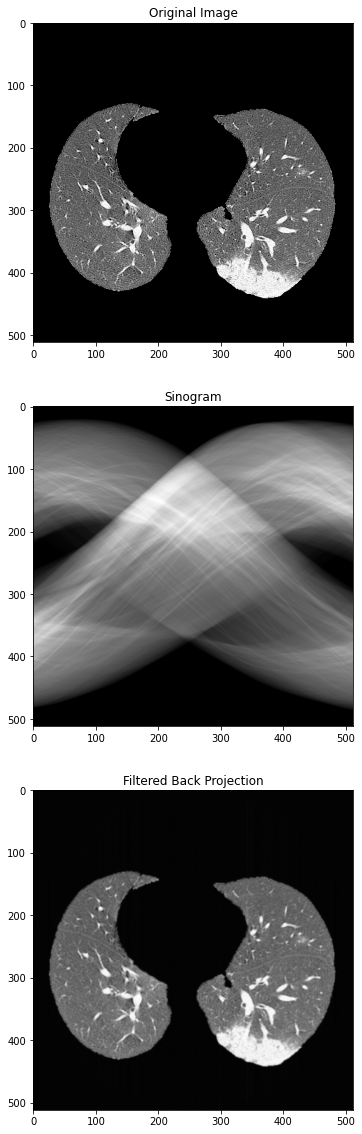

In [ ]:
# with max_angle = 180 deg.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[600], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram180[600], cmap=plt.cm.Greys_r)

#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP180[600], cmap=plt.cm.Greys_r)

In [ ]:
PSNR =[]
SSIM = []
for i in range(len(reconstructedCT_FBP180)):
  PSNR.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP180[i]))
  SSIM.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP180[i], multichannel=False))
print(PSNR[600])
print(SSIM[600])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


12.427041971001028
0.6544412051594269


In [ ]:
sinogram4x = []
reconstructedCT_FBP4x = []
reconstructedCT_SART4x = []
ClassData4x = []
max_angle = 180
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
for i in range(len(ctscansarray)):
  ClassData4x.append(CT(ctscansarray[i],max_angle,filter_used))
for i in range(len(ctscansarray)):
  sinogram4x.append(ClassData4x[i].radon_transform())
  reconstructedCT_FBP4x.append(ClassData4x[i].filtered_back_projection())
  #reconstructedCT_SART.append(ClassData[i].sart())

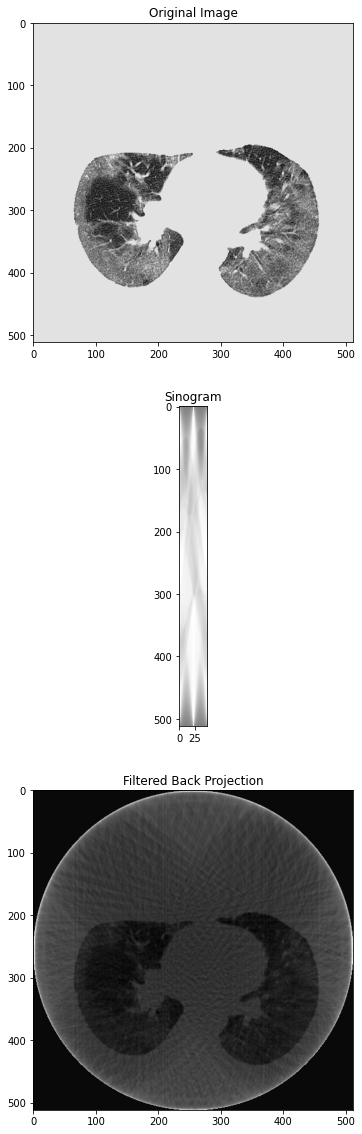

In [ ]:
# with max_angle = 180 deg./4x
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[3514], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram4x[3514], cmap=plt.cm.Greys_r)
#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP4x[3514], cmap=plt.cm.Greys_r)

In [ ]:
PSNR4x =[]
SSIM4x = []
for i in range(len(reconstructedCT_FBP4x)):
  PSNR4x.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP4x[i]))
  SSIM4x.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP4x[i], multichannel=False))

print(PSNR4x[18])
print(SSIM4x[18])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


1.1572833216310467
0.006905215881176878


In [ ]:
avg_PSNR4x = [0]
avg_SSIM4x = [0]
Sum_PSNR4x = [0]
Sum_SSIM4x = [0]
for i in range(len(reconstructedCT_FBP4x)):
  Sum_PSNR4x += PSNR4x[i]
  Sum_SSIM4x += SSIM4x[i]

avg_PSNR4x = (Sum_PSNR4x/(len(PSNR4x)))
avg_SSIM4x = (Sum_SSIM4x/len(SSIM4x))
print(avg_PSNR4x)
print(avg_SSIM4x)

[6.0560631]
[0.16157094]


In [ ]:
sinogram8x = []
reconstructedCT_FBP8x = []
reconstructedCT_SART8x = []
ClassData8x = []
max_angle = 180
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
for i in range(len(ctscansarray)):
  ClassData8x.append(CT(ctscansarray[i],max_angle,filter_used))
for i in range(len(ctscansarray)):
  sinogram8x.append(ClassData8x[i].radon_transform())
  reconstructedCT_FBP8x.append(ClassData8x[i].filtered_back_projection())

/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


In [ ]:
len(reconstructedCT_FBP8x)

3554

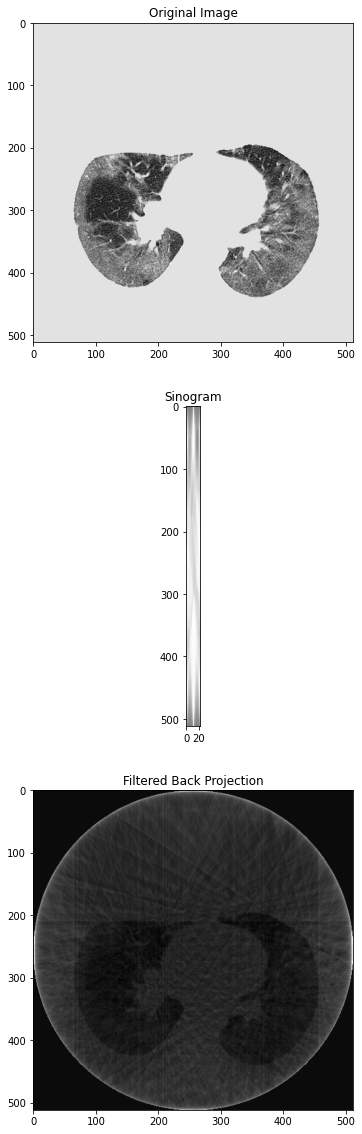

In [ ]:
# with max_angle = 180 deg./8x
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[3514], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram8x[3514], cmap=plt.cm.Greys_r)

#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP8x[3514], cmap=plt.cm.Greys_r)

In [ ]:
PSNR8x =[]
SSIM8x = []
for i in range(len(reconstructedCT_FBP8x)):
  PSNR8x.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP8x[i]))
  SSIM8x.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP8x[i], multichannel=False))

print(PSNR8x[18])
print(SSIM8x[18])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


1.157388302874974
0.006905382744454827


In [ ]:
avg_PSNR8x = [0]
avg_SSIM8x = [0]
Sum_PSNR8x = [0]
Sum_SSIM8x = [0]
for i in range(len(reconstructedCT_FBP8x)):
  Sum_PSNR8x += PSNR8x[i]
  Sum_SSIM8x += SSIM8x[i]

avg_PSNR8x = (Sum_PSNR8x/(len(PSNR8x)))
avg_SSIM8x = (Sum_SSIM8x/len(SSIM8x))
print(avg_PSNR8x)
print(avg_SSIM8x)

[6.05618027]
[0.16150934]


In [ ]:
class KmeansSegmentation:

    def segmentation_grey(self, image, k=2):
        """Performs segmentation of an grey level input image using KMeans algorithm, using the intensity of the pixels as features
        takes as input:
        image: a grey scale image
        return an segemented image
        The function is the modified version Adopted from the github User
        https://github.com/DSGeek24/Image-segmentation_KMeans/
        """
        #assigning cluster centroids clusters
        centroids = []
        clusters=[]

        i=1
        # Initializes k number of centroids for the clustering making sure no cluster centroids are same

        while(len(centroids)!=k):
            cent = image[np.random.randint(0, image.shape[0]), np.random.randint(0, image.shape[1])]
            if(len(centroids)>=1):
                if(cent not in centroids):
                    centroids.append(cent)
            else:
                centroids.append(cent)
        print("Initial centroids are {}".format(centroids))

        # Initializing k clusters
        for m in range(0, k):
            cluster=[]
            clusters.append(cluster)

        # Calling k means which returns the clusters with pixels
        clusters = self.kmeans(clusters, image, centroids, k)
        new_centroids=self.calculate_new_centroids(clusters,k)

        # clustering and finding new centroids till convergence is reached
        while(not(np.array_equal(new_centroids,centroids))) and i<=15:
            centroids=new_centroids
            clusters=self.kmeans(clusters,image,centroids,k)
            new_centroids = self.calculate_new_centroids(clusters, k)
            i=i+1
        print("Convergence reached")

        image=self.assignPixels(clusters,image,k)
        return image

    def findMinIndex(self,pixel, centroids):
        d = []
        for i in range(0, len(centroids)):
            d1 = abs(int(pixel) - centroids[i])
            d.append(d1)
        minIndex = d.index(min(d))
        return minIndex

    def assignPixels(self,clusters,image,k):
        cluster_centroids=[]
        for i in range(0, k):
            cent = np.nanmean(clusters[i])
            cluster_centroids.append(cent)

        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                Value = round(cluster_centroids[self.findMinIndex(image[x,y], cluster_centroids)])
                image[x, y] = Value
        return image

    def kmeans(self, clusters, image, centroids, k):

        def add_cluster(minIndex, pixel):
            try:
                clusters[minIndex].append(pixel)
            except KeyError:
                clusters[minIndex] = [pixel]
        for x in range(0, image.shape[0]):
            for y in range(0, image.shape[1]):
                pixel = image[x, y].tolist()
                minIndex = self.findMinIndex(pixel, centroids)
                add_cluster(minIndex, pixel)
        return clusters

    def calculate_new_centroids(self,clusters,k):
        new_centroids=[]
        for i in range(0, k):
            cent = np.nanmean(clusters[i])
            new_centroids.append(round(cent))
        return new_centroids

In [ ]:
Segementation_object = KmeansSegmentation()
Rec4xKmeanSegData = []
Rec4xKmeanSegData.append(Segementation_object.segmentation_grey(reconstructedCT_FBP4x[3510], 3))

In [ ]:
Segementation_object = KmeansSegmentation()
Rec8xKmeanSegData = []
Rec8xKmeanSegData.append(Segementation_object.segmentation_grey(reconstructedCT_FBP8x[3510], 3))

Initial centroids are [0.0, 1.0, 3.0]
Convergence reached


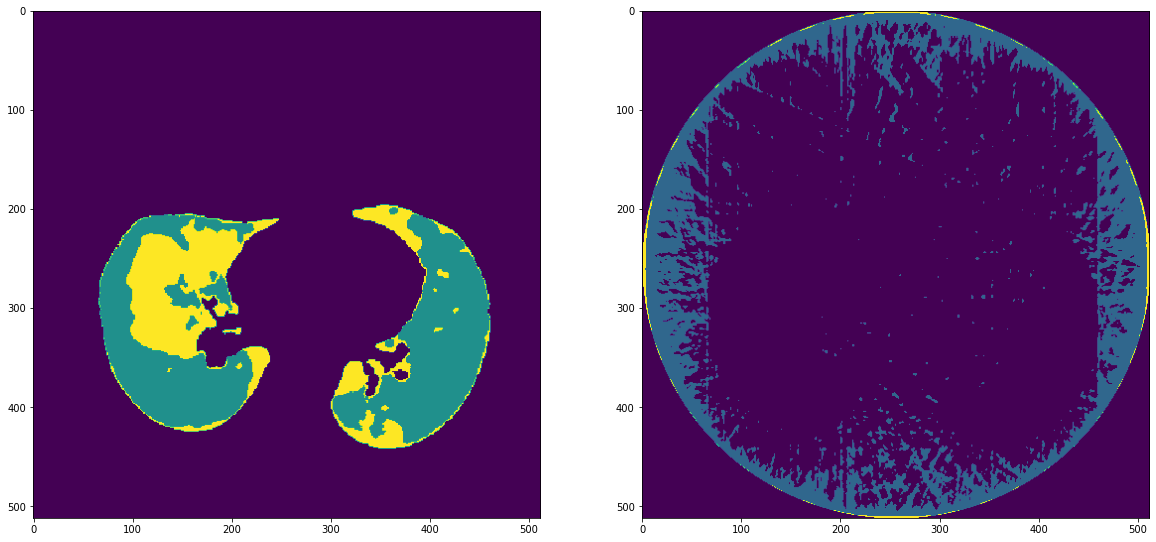

In [ ]:
fig, ((ax1)) = plt.subplots(1, 2,figsize=(20, 20))
ax1[0].imshow((ctmasksarray[3510]))#,cmap="gray")
ax1[1].imshow((Rec8xKmeanSegData[0]))#,cmap="gray")

In [ ]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 2,figsize=(20, 20))
ax1[0].imshow((ctmasksarray[3514]))#,cmap="gray")
ax1[1].imshow((Rec8xKmeanSegData[3514]))#,cmap="gray")
ax2[0].imshow((ctmasksarray[3514]))#,cmap="gray")
ax2[1].imshow((Rec8xKmeanSegData[3514]))#,cmap="gray")
ax3[0].imshow((ctmasksarray[3514]))#,cmap="gray")
ax3[1].imshow((Rec8xKmeanSegData[3514]))#,cmap="gray")

In [ ]:
RecPSNR8x =[]
RecSSIM8x = []
for i in range(len(Rec8xKmeanSegData)):
  RecPSNR8x.append(peak_signal_noise_ratio(ctscansarray[i], Rec8xKmeanSegData[i]))
  RecSSIM8x.append(structural_similarity(ctscansarray[i], Rec8xKmeanSegData[i], multichannel=False))

print(RecPSNR8x[5])
print(RecSSIM8x[5])

In [ ]:
RecPSNR8x =[]
RecSSIM8x = []
RecPSNR8x.append(peak_signal_noise_ratio(ctscansarray[3510], Rec8xKmeanSegData[0]))
RecSSIM8x.append(structural_similarity(ctscansarray[3510], Rec8xKmeanSegData[0], multichannel=False))

print(RecPSNR8x[0])
print(RecSSIM8x[0])

2.560251535871008
0.0018295431238205798


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  after removing the cwd from sys.path.


In [ ]:
RecPSNR4x =[]
RecSSIM4x = []
for i in range(len(Rec8xKmeanSegData)):
  RecPSNR4x.append(peak_signal_noise_ratio(ctscansarray[i], Rec4xKmeanSegData[i]))
  RecSSIM4x.append(structural_similarity(ctscansarray[i], Rec4xKmeanSegData[i], multichannel=False))

print(RecPSNR4x[5])
print(RecSSIM4x[5])